In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.express as plx
sbn.set_theme(color_codes=True, style="darkgrid")

In [2]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()


Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [3]:
df.shape

(374, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# Observation 
#    - 5 Columns object data type
#    - some values are null in Sleep disorder(target variable)

In [6]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [7]:
# Replace nan with no disorder
df["Sleep Disorder"]=df["Sleep Disorder"].where(pd.notnull(df["Sleep Disorder"]),"No Disorder")

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df.describe() #Statistical info for Int Variable

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [10]:
df.describe(include="O") #Statistical info for object variable

Gender Occupation BMI Category Blood Pressure Sleep Disorder
count     374        374          374            374            374
unique      2         11            4             25              3
top      Male      Nurse       Normal         130/85    No Disorder
freq      189         73          195             99            219

# EDA

In [11]:
col_name=df.columns
col_name

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [12]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [13]:
df.drop(columns="Person ID", inplace=True)

In [14]:
df[["Upper BP","Lower BP"]]=df["Blood Pressure"].str.split("/", expand =True).astype(int)
df.drop(columns="Blood Pressure", inplace=True)

In [15]:
df.head()


Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       42             6   Overweight          77   
1                       60             8       Normal          75   
2                       60             8       Normal          75   
3                       30             8        Obese          85   
4                       30             8        Obese          85   

   Daily Steps Sleep Disorder  Upper BP  Lower BP  
0         4200    No Disorder       126        83  
1        10000    No Disorder       125        80  
2        10000    No Disorder       125        80  
3         3000    Sleep Apnea       140        90  
4         3000    Sleep Apnea       140        90

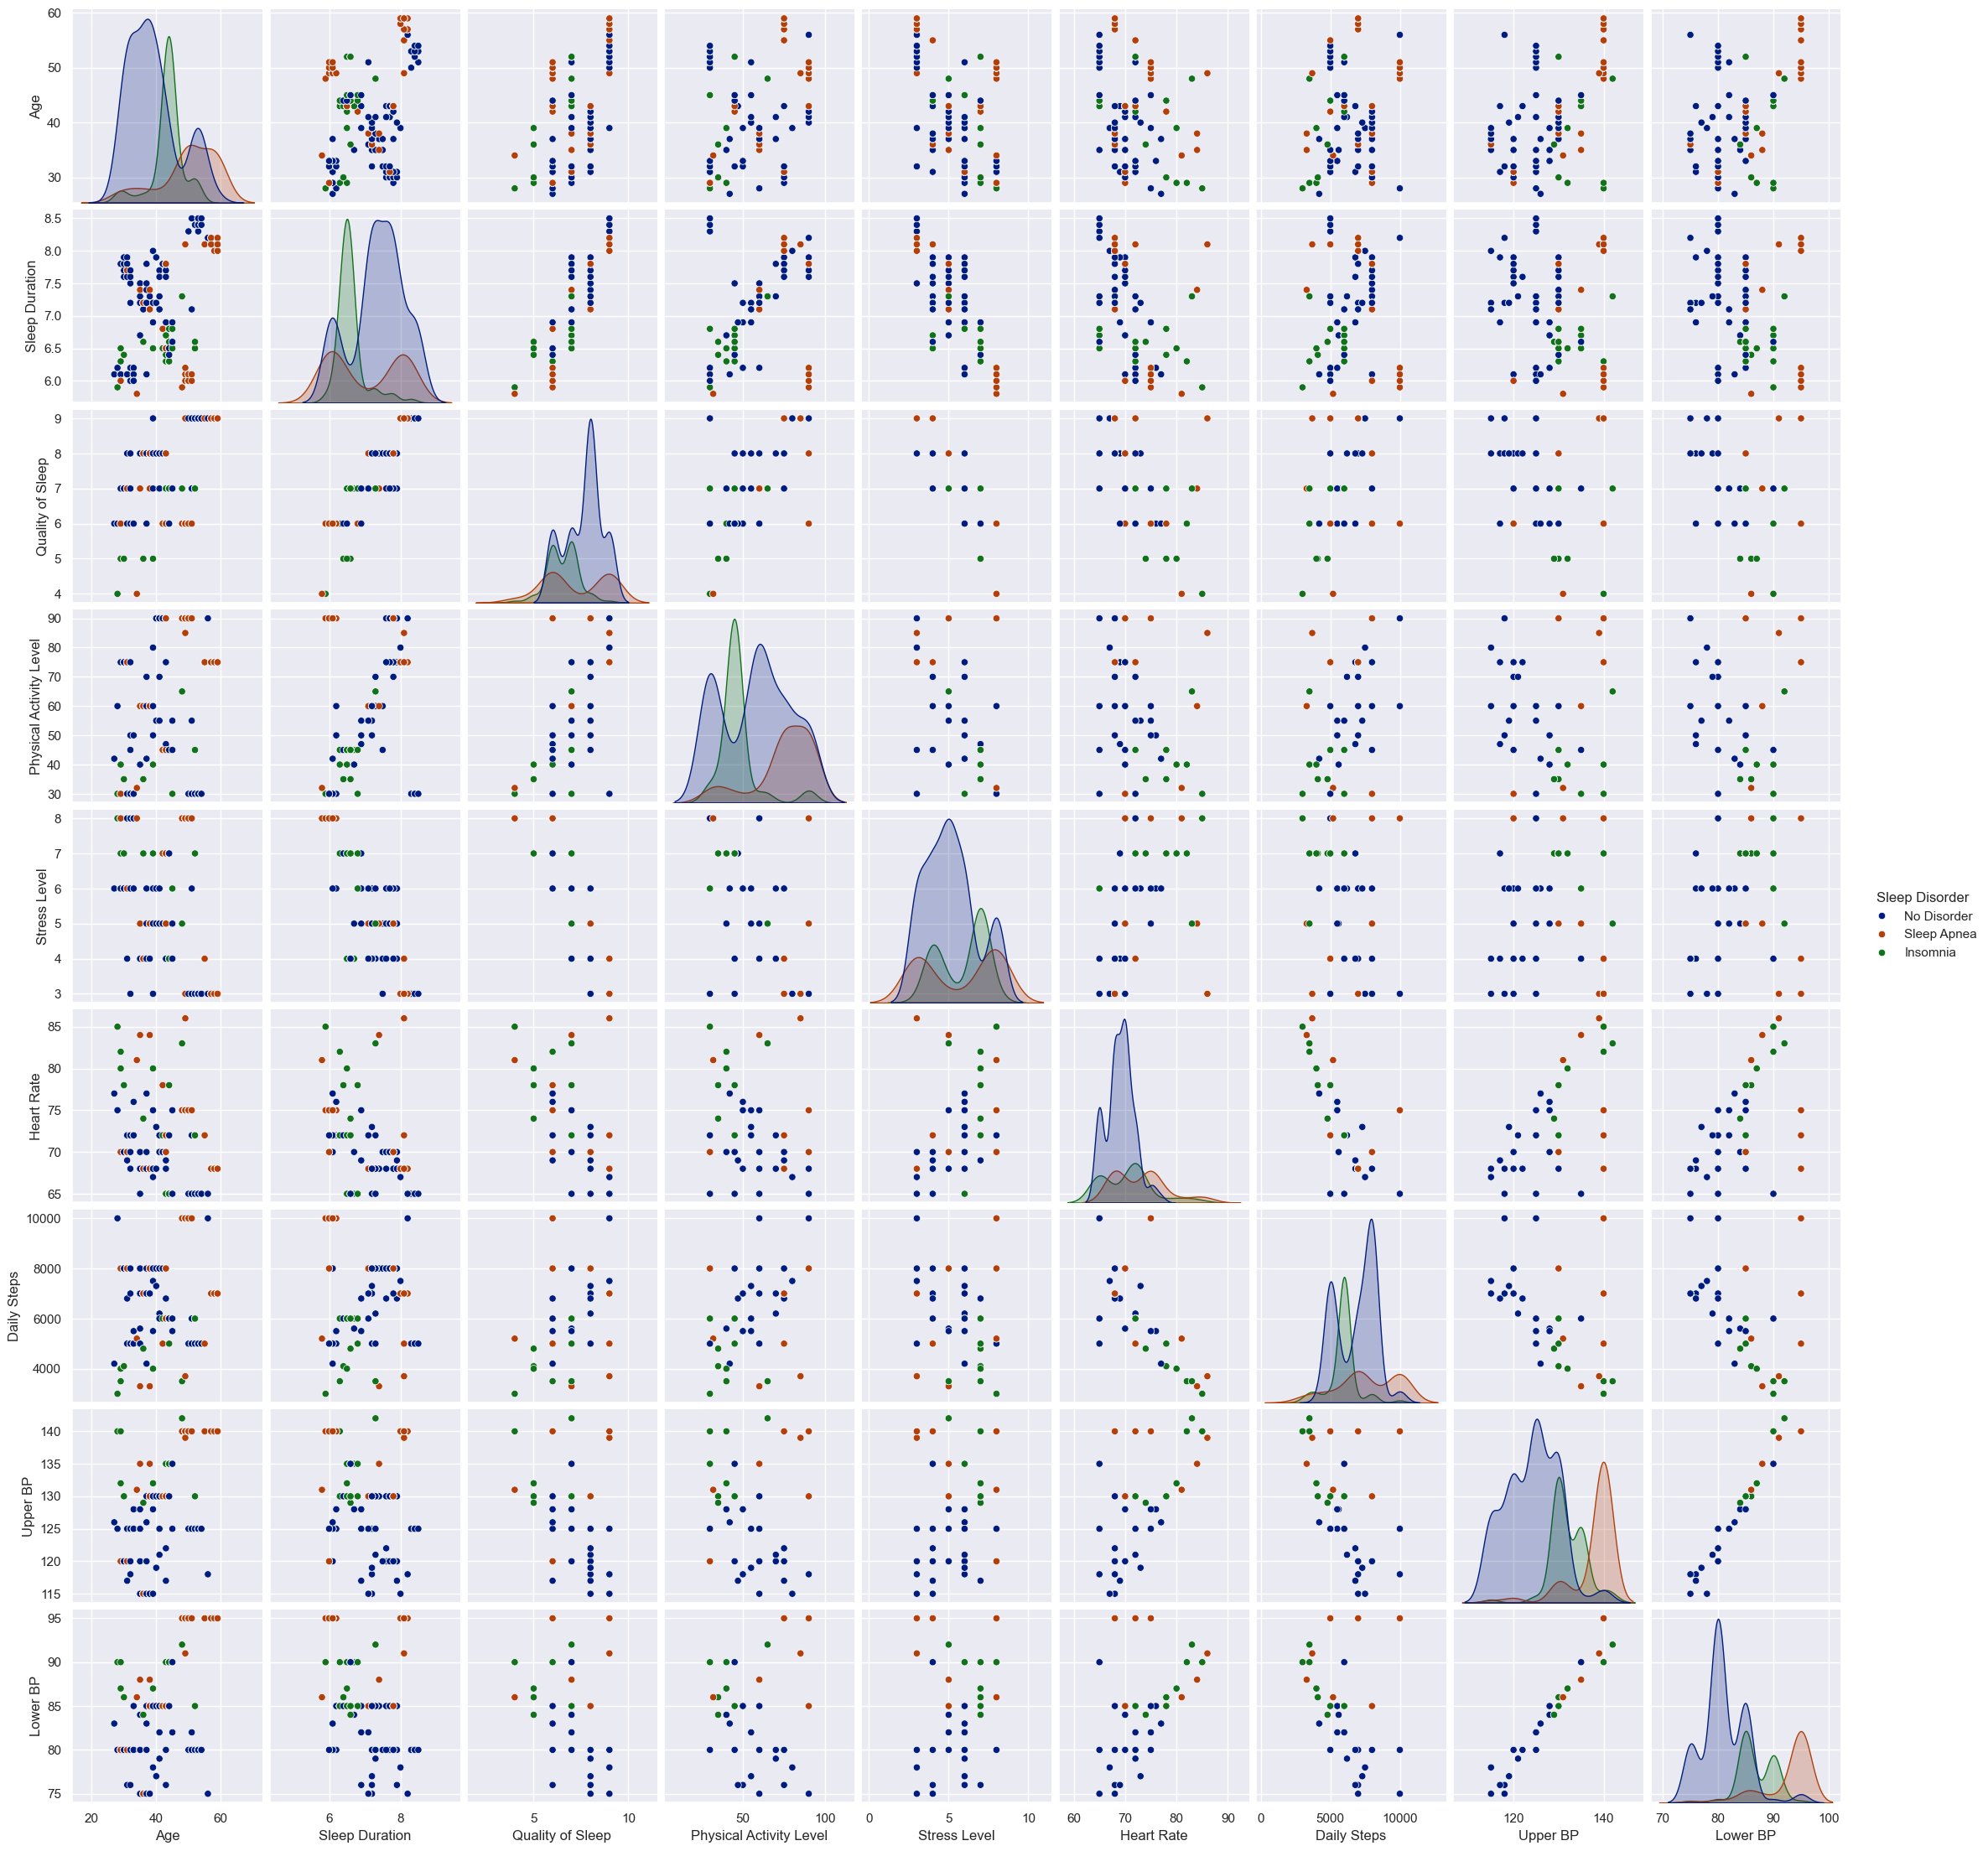

In [16]:
sbn.pairplot(data=df,hue="Sleep Disorder", palette="dark")

In [17]:
fig=plx.histogram(df,x="Sleep Disorder", color="Sleep Disorder",text_auto=True)

fig.update_layout(title="Distribution of People based on Sleep Disorder")

# Gender

In [18]:
df.groupby("Sleep Disorder")["Gender"].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
No Disorder     Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

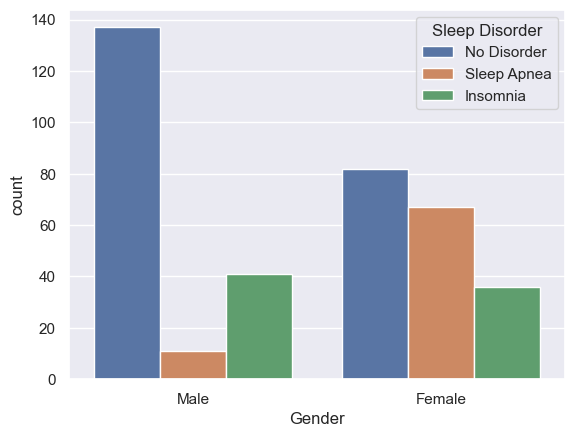

In [19]:
sbn.countplot(x="Gender", hue="Sleep Disorder", data=df)

<Axes: ylabel='count'>

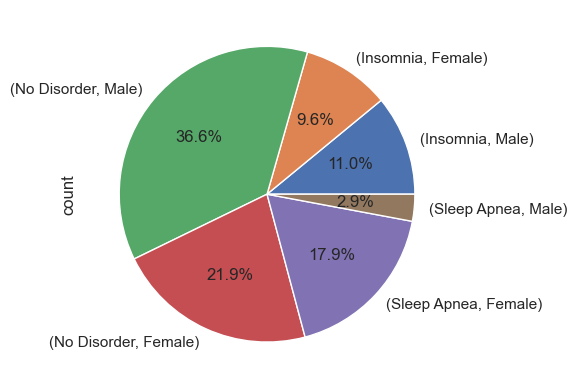

In [20]:
df.groupby("Sleep Disorder")["Gender"].value_counts().plot.pie(autopct="%1.1f%%")

In [21]:
cat_cols=df.select_dtypes(include="object").columns
num_cols=df.select_dtypes(exclude="object").columns

In [22]:
num_cols, cat_cols

(Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
        'Stress Level', 'Heart Rate', 'Daily Steps', 'Upper BP', 'Lower BP'],
       dtype='object'),
 Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object'))

# Plot categorical variables

C:\Users\sr844\AppData\Local\Temp\ipykernel_16964\1288730846.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sr844\AppData\Local\Temp\ipykernel_16964\1288730846.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sr844\AppData\Local\Temp\ipykernel_16964\1288730846.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



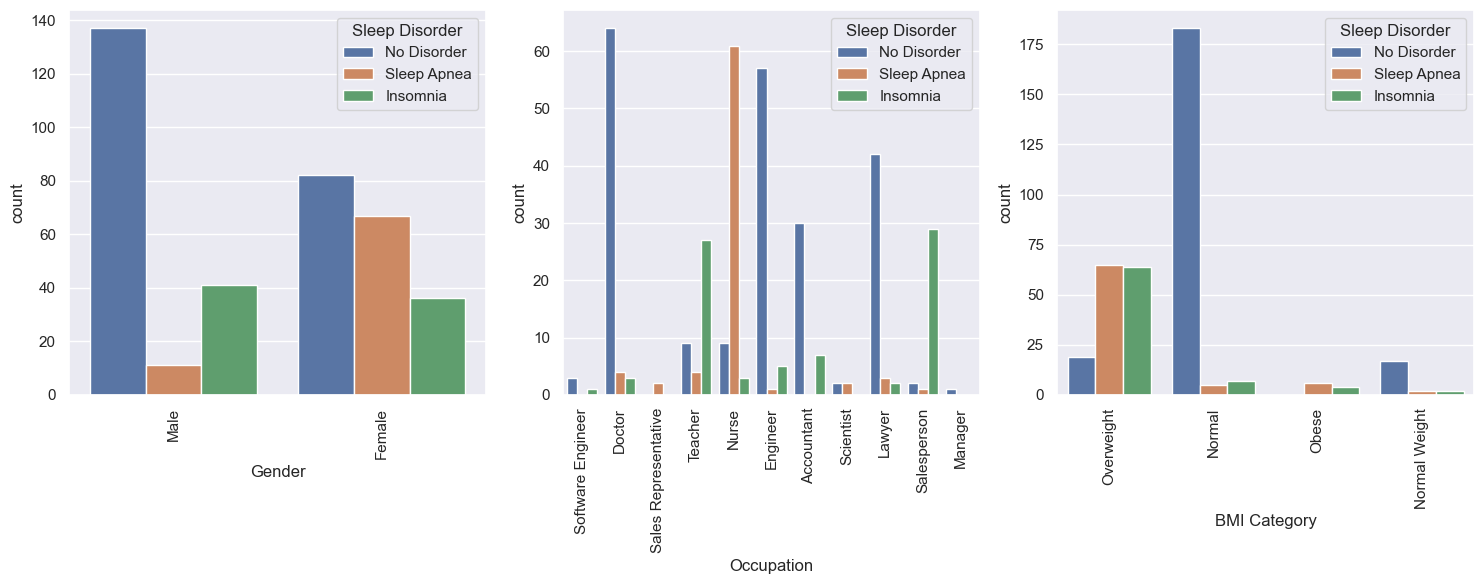

In [23]:
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axs=axs.flatten()

for i, var in enumerate(cat_cols[:3]):
    sbn.countplot(x=var, hue="Sleep Disorder", data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()
plt.show()
    

In [24]:
''' Observation
Mostly Doctors have no disorder 
Mostly nurse have sleep apnea
Mostly salesperson have isnomia
Overweight persons have both.'''

' Observation\nMostly Doctors have no disorder \nMostly nurse have sleep apnea\nMostly salesperson have isnomia\nOverweight persons have both.'

<Axes: xlabel='Occupation', ylabel='Count'>

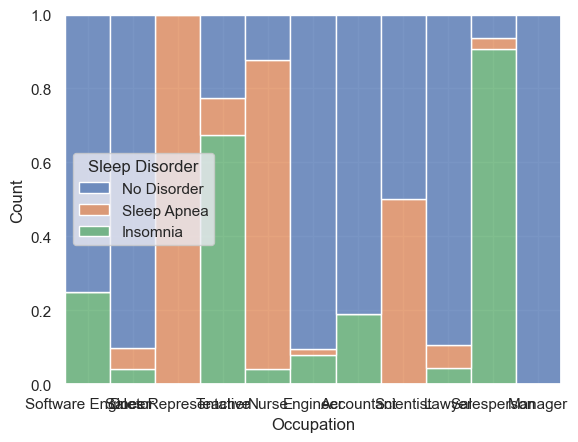

In [25]:
sbn.histplot(x=df["Occupation"],hue="Sleep Disorder", data=df, multiple="fill",kde=False,element="bars",fill=True)

C:\Users\sr844\AppData\Local\Temp\ipykernel_16964\2125609749.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sr844\AppData\Local\Temp\ipykernel_16964\2125609749.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sr844\AppData\Local\Temp\ipykernel_16964\2125609749.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



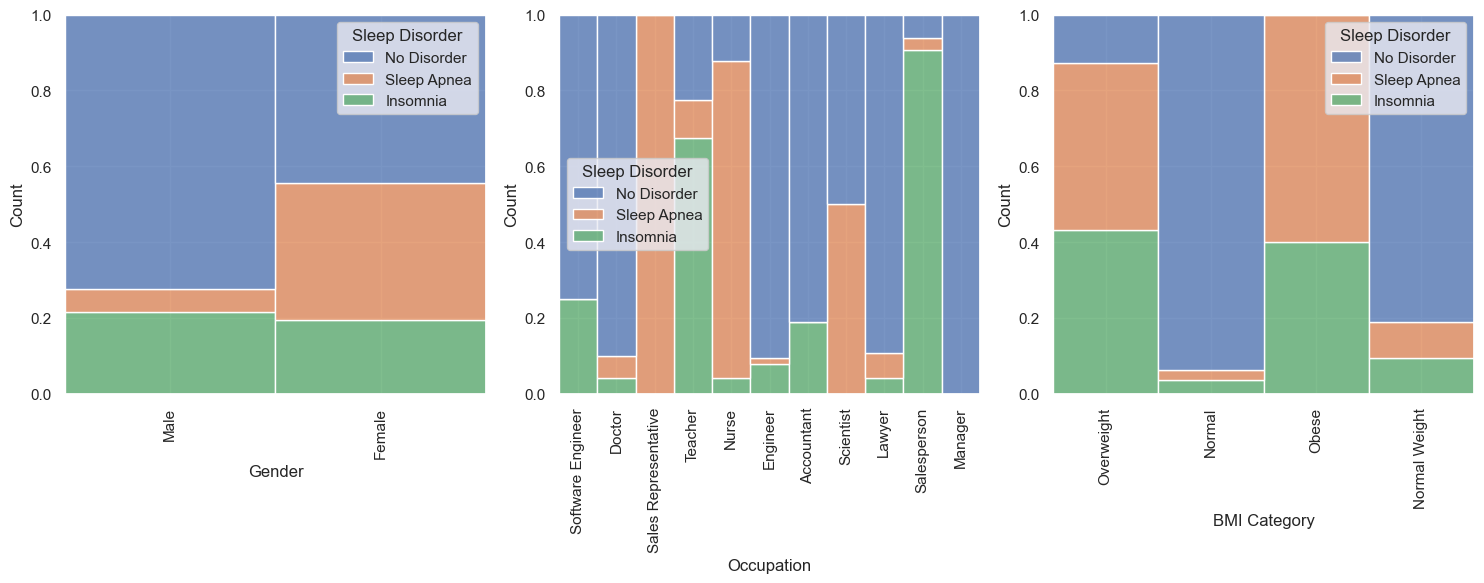

In [26]:
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axs=axs.flatten()

for i, var in enumerate(cat_cols[:3]):
    sbn.histplot(x=var,hue="Sleep Disorder", data=df,ax=axs[i], multiple="fill",kde=False,element="bars",fill=True)
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()
plt.show()
    

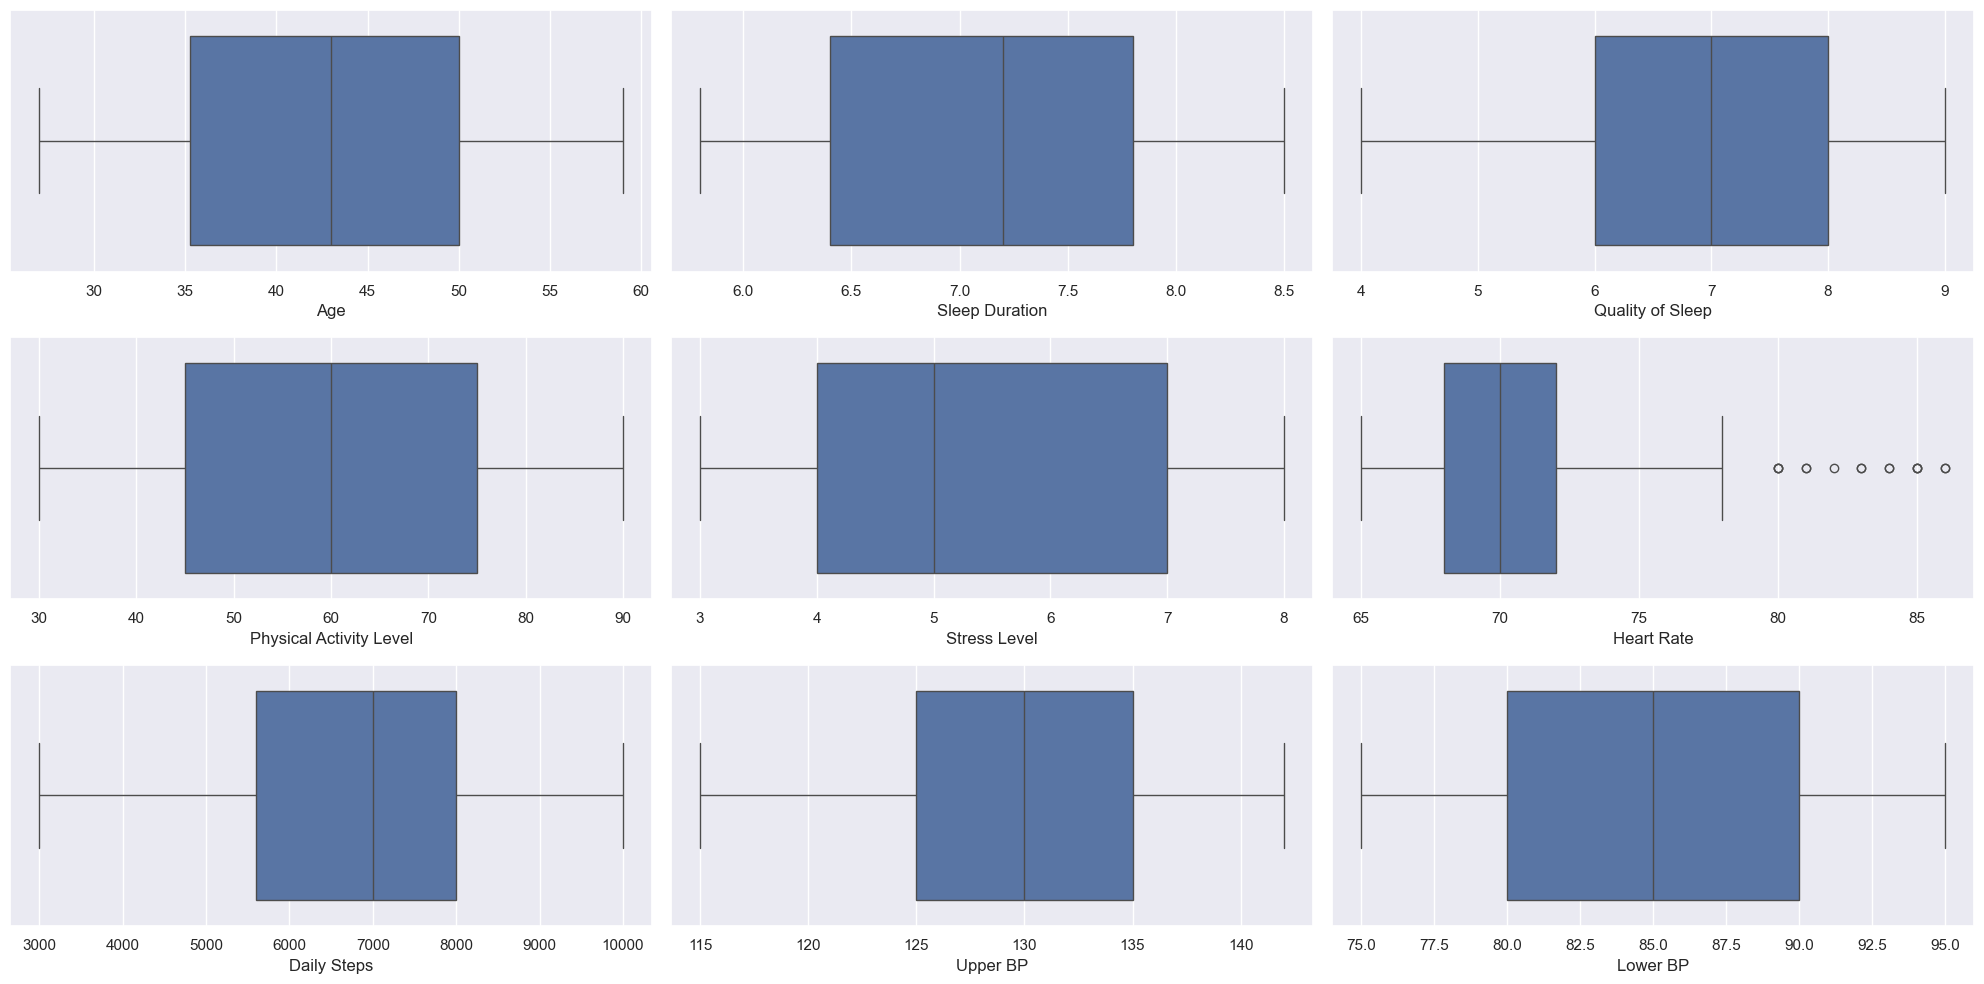

In [27]:
fig,axs=plt.subplots(nrows=3, ncols=3, figsize=(20,10))
axs=axs.flatten()

for i, var in enumerate(num_cols):
    sbn.boxplot(x=var, data=df,ax=axs[i])
fig.tight_layout()
plt.show()
    

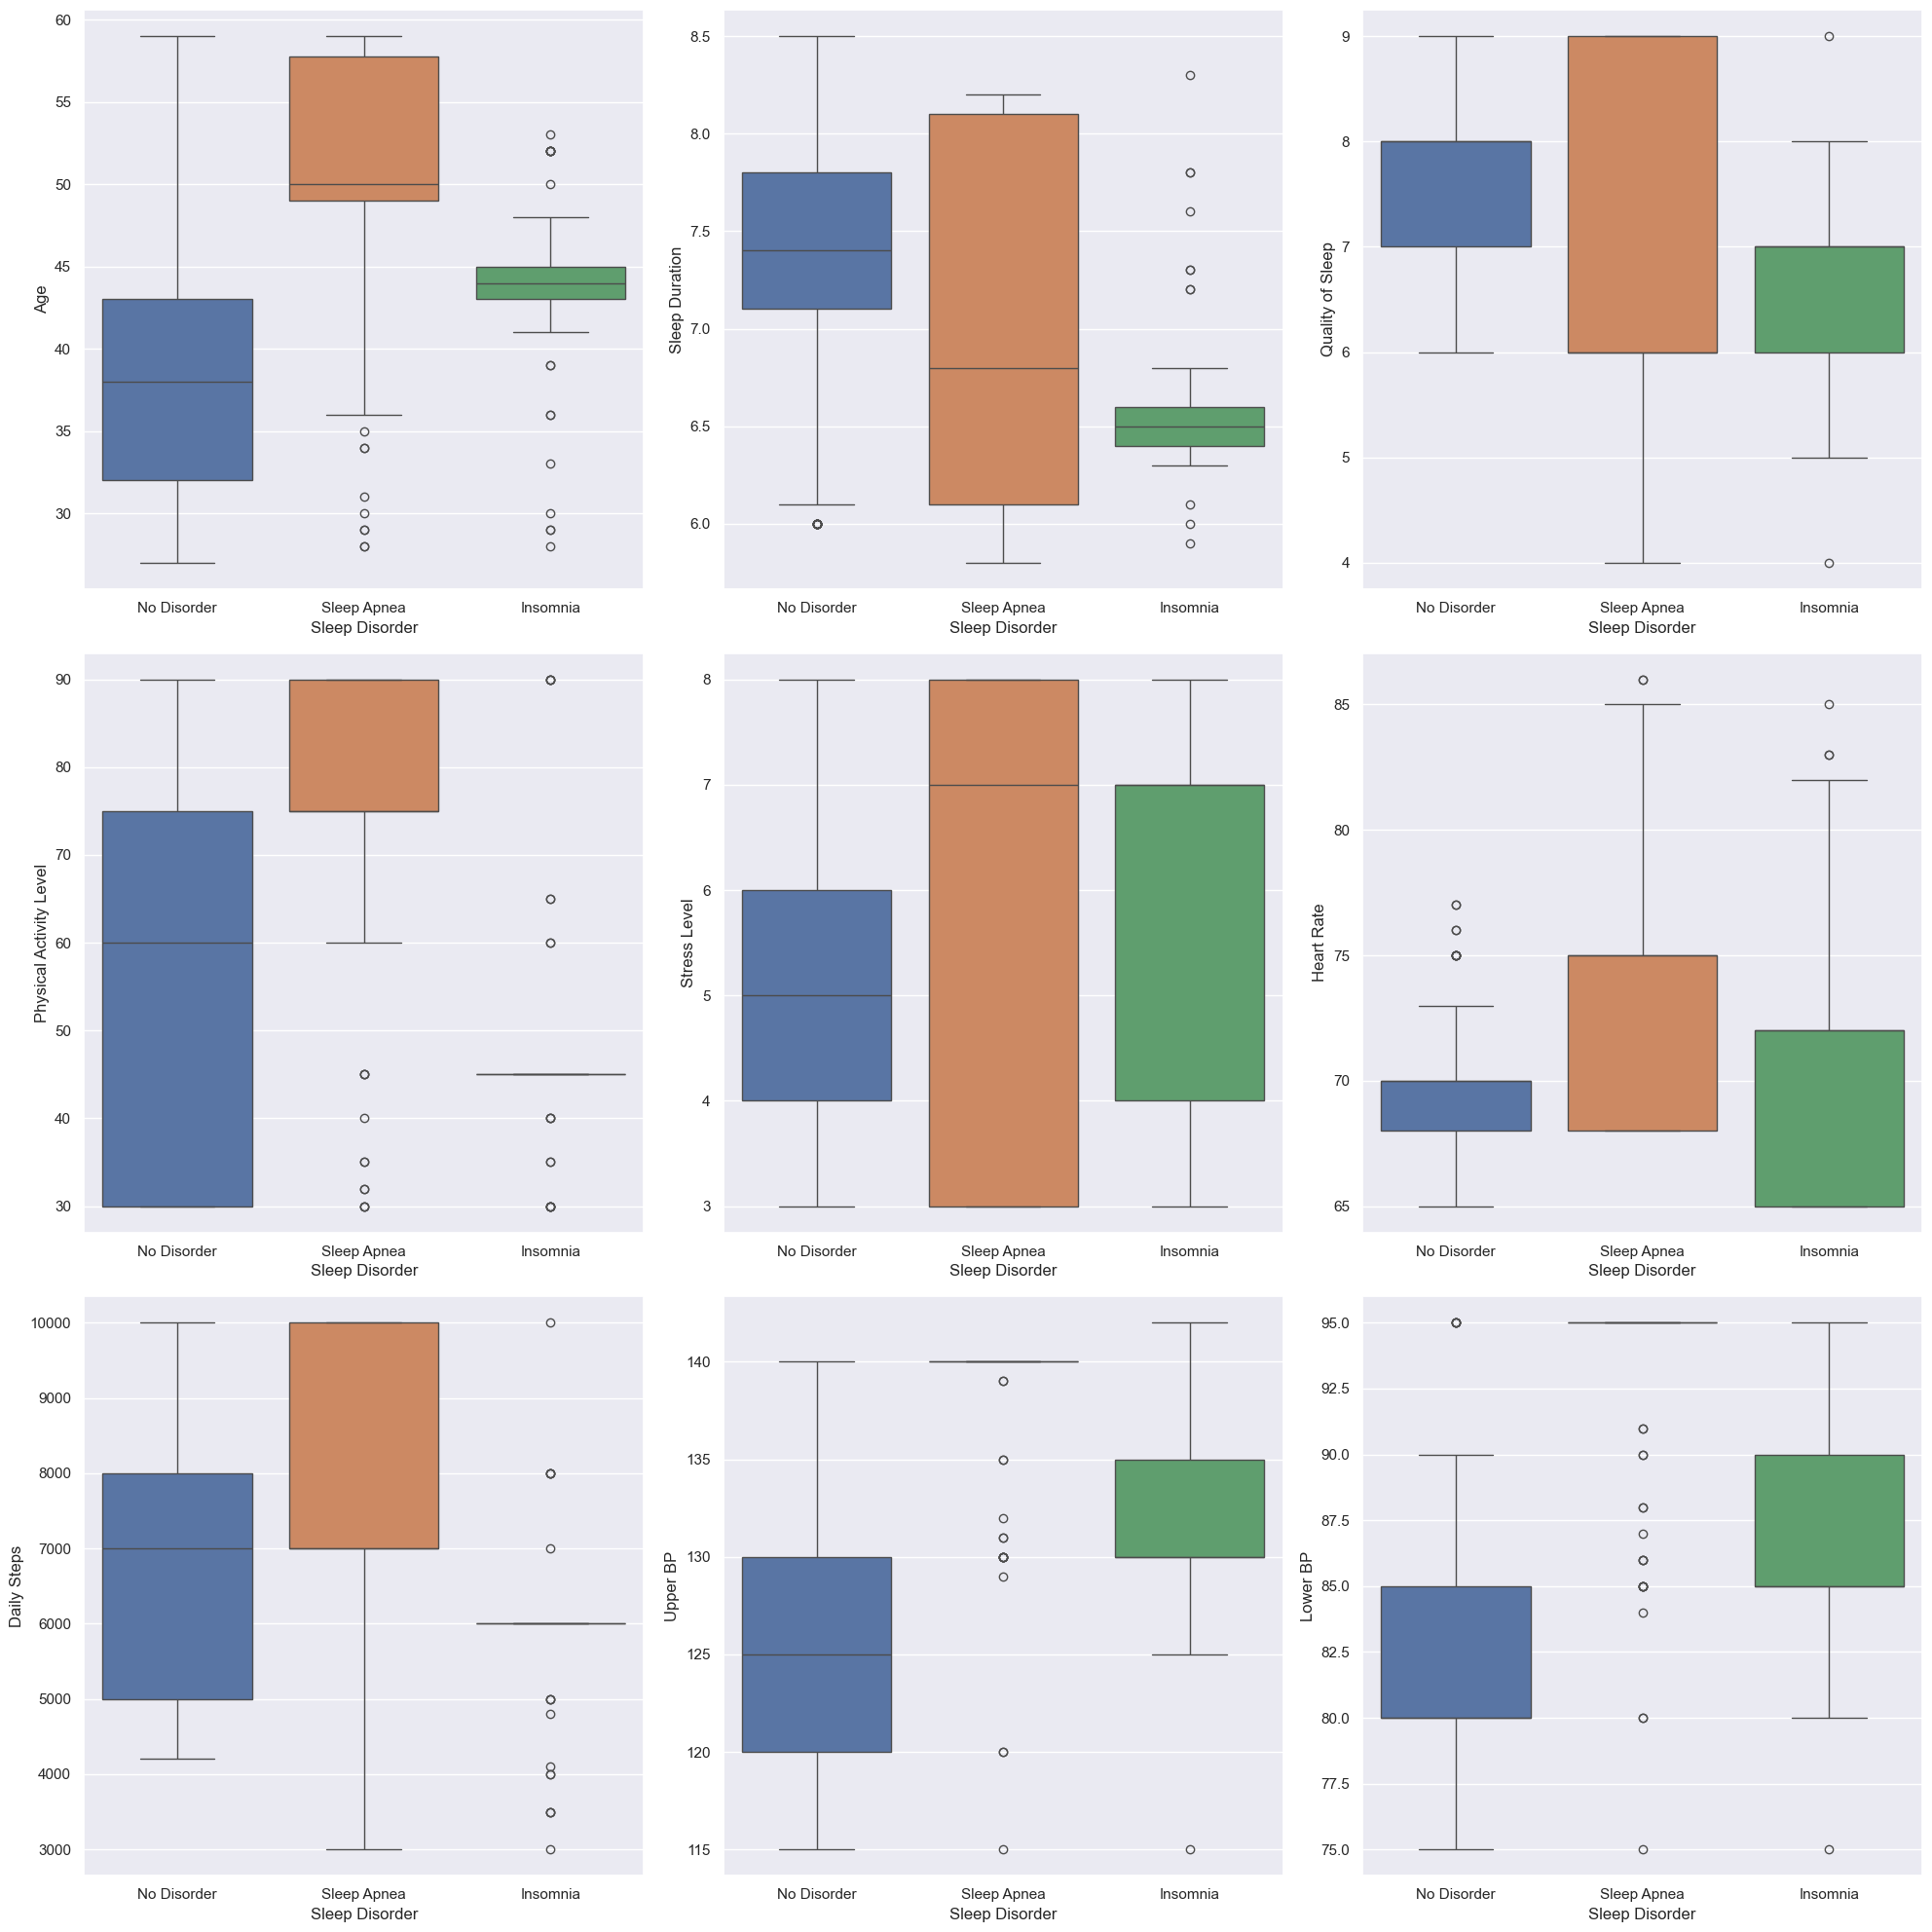

In [28]:
fig,axs=plt.subplots(nrows=3, ncols=3, figsize=(20,20))
axs=axs.flatten()

for i, var in enumerate(num_cols):
    sbn.boxplot(y=var,x="Sleep Disorder", data=df,ax=axs[i],hue="Sleep Disorder")
fig.tight_layout()
plt.show()

<Axes: xlabel='Stress Level', ylabel='count'>

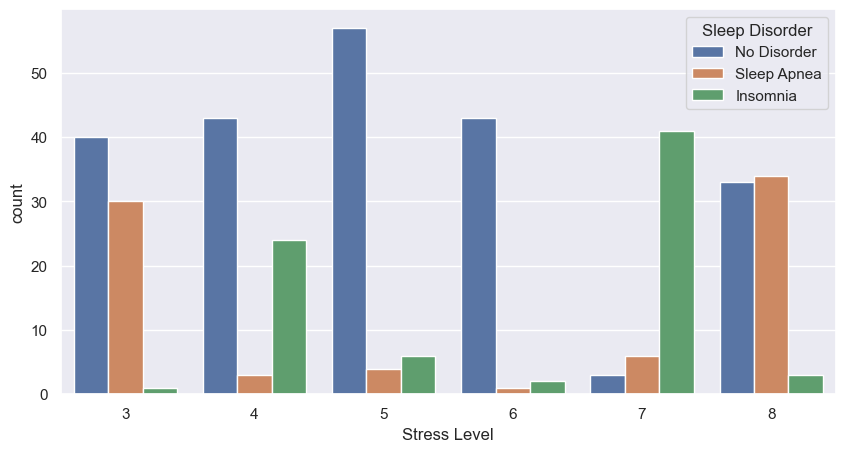

In [29]:
plt.figure(figsize=(10,5))
sbn.countplot(x="Stress Level",hue="Sleep Disorder",data=df)

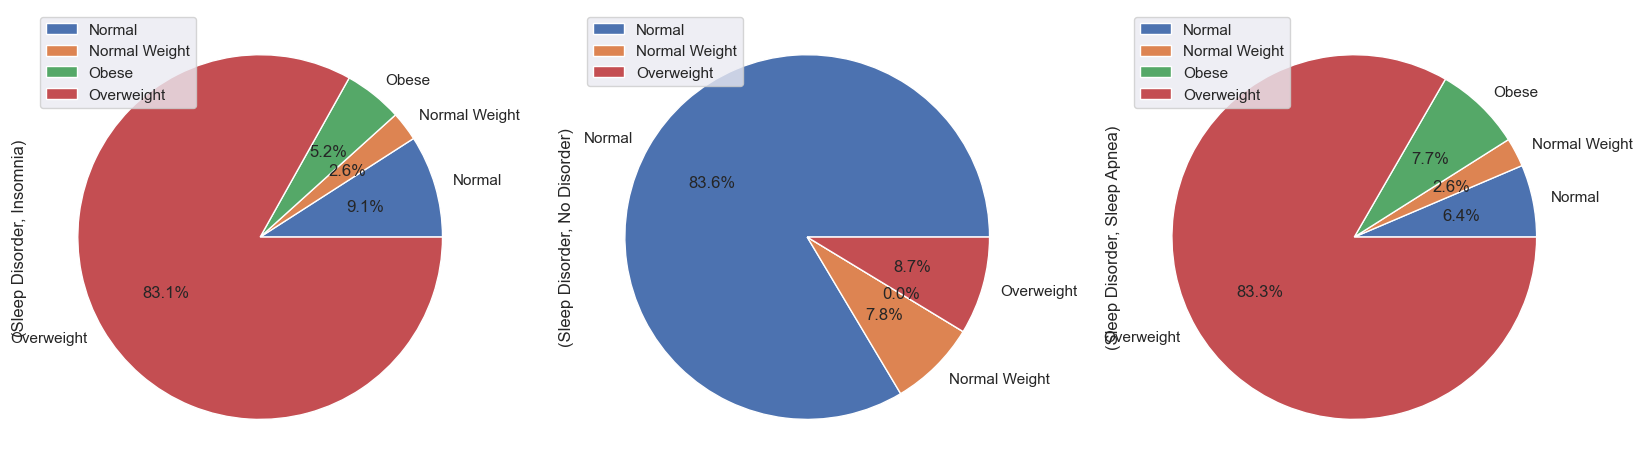

In [30]:
df.pivot_table(index="BMI Category" , columns="Sleep Disorder" ,aggfunc={"Sleep Disorder":"count"}).plot.pie(autopct='%1.1f%%',subplots=True,figsize=(20,10))
plt.show()

# Data Preprocessing

In [31]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Upper BP                   0
Lower BP                   0
dtype: int64

In [32]:
for col in cat_cols:
    print(f"{col}:{df[col].unique()}")

Gender:['Male' 'Female']
Occupation:['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category:['Overweight' 'Normal' 'Obese' 'Normal Weight']
Sleep Disorder:['No Disorder' 'Sleep Apnea' 'Insomnia']


# Label encoding of cat_cols

In [33]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le=LabelEncoder()
    #fit
    le.fit(df[col].unique())
    
    #Encoder
    df[col]=le.transform(df[col])
    
    print(f"{col}:{df[col].unique()}")

Gender:[1 0]
Occupation:[ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category:[3 0 2 1]
Sleep Disorder:[1 2 0]


# Correlation

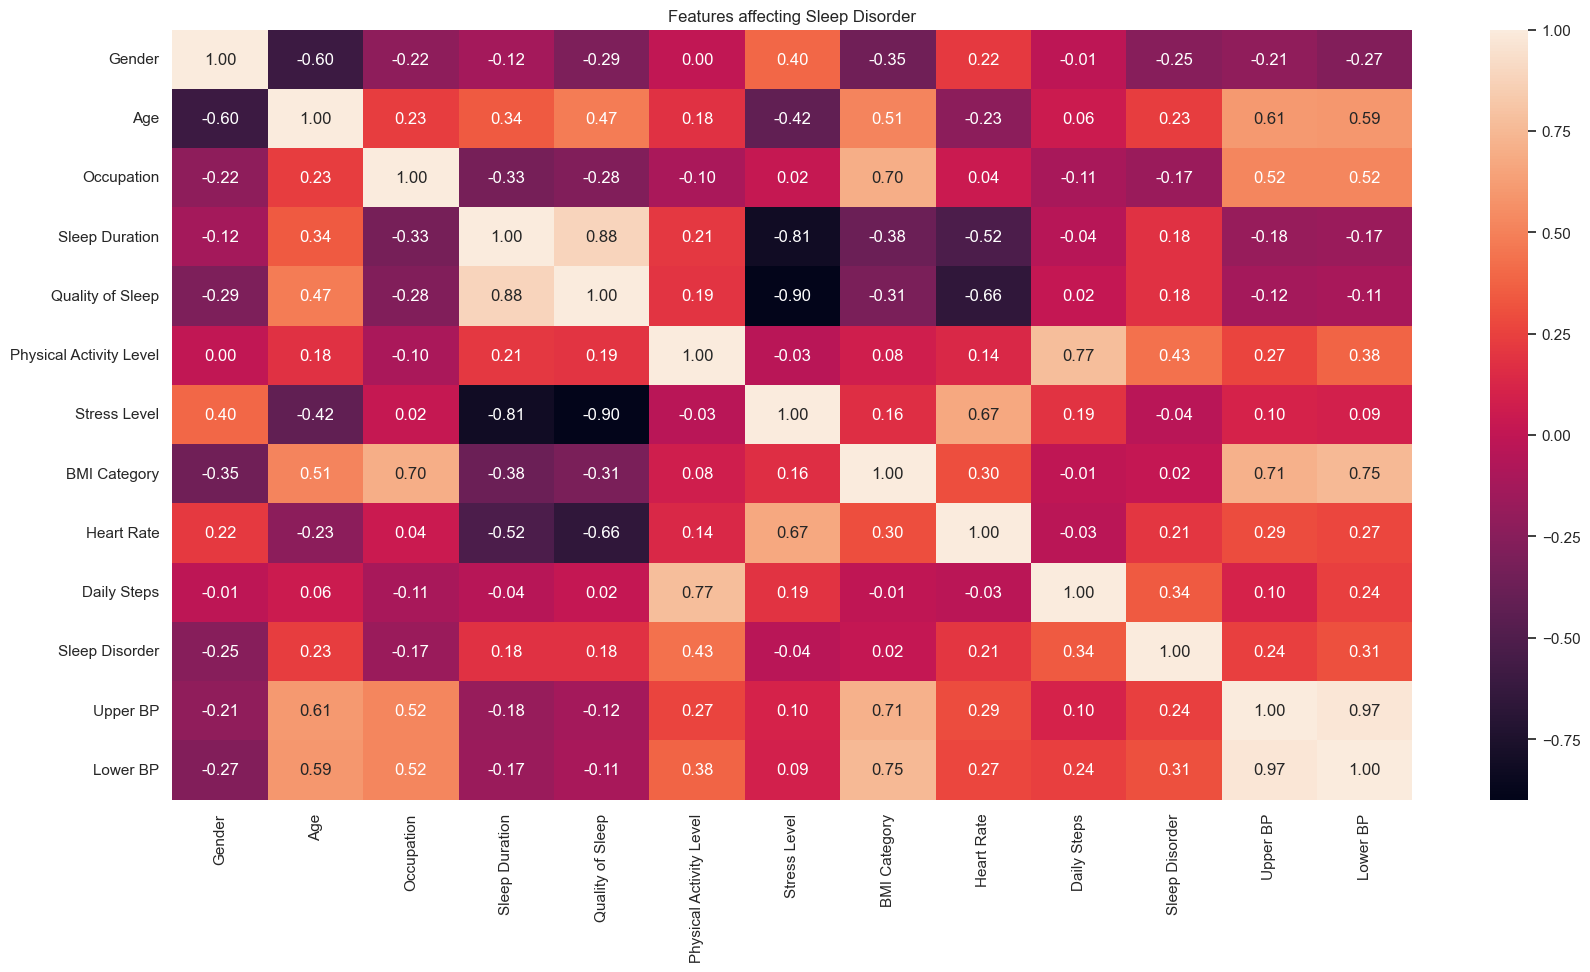

In [34]:
plt.figure(figsize=(20,10))
sbn.heatmap(df.corr(),fmt=".2f",annot=True)
plt.title("Features affecting Sleep Disorder")
plt.show()

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
x=df.drop("Sleep Disorder", axis=1)
y=df["Sleep Disorder"]

#split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [36]:
print(f"Shape of x_train:{x_train.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of x_test:{x_test.shape}")
print(f"Shape of y_test:{y_test.shape}")

Shape of x_train:(261, 12)
Shape of y_train:(261,)
Shape of x_test:(113, 12)
Shape of y_test:(113,)


# Model Training

# 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\sr844\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [38]:
lr.score(x_train,y_train)

0.7279693486590039

In [39]:
lr.score(x_test,y_test)

0.672566371681416

In [40]:
lr_pred=lr.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
accuracy_score(y_test,lr_pred)

0.672566371681416

In [42]:
def model_accuracy(model,model_name):
    """ To print the accuracy score"""
    y_pred=model.predict(x_test)
    print(f"------------------------{model_name}-------------------------------------------------------------------")
    print(f"Accuracy:{round(accuracy_score(y_test,y_pred)*100,2)}%")
    print(f"F1 Score:{round(f1_score(y_test,y_pred,average="micro"),2)}")
    print(f"Precison Score:{round(precision_score(y_test,y_pred,average="micro"),2)}")
    print(f"Recall Score:{round(recall_score(y_test,y_pred,average="micro"),2)}")
    print(f"Jaccard Score:{round(jaccard_score(y_test,y_pred,average="micro"),2)}")
    
    

In [43]:
model_accuracy(lr, 'Logistic Regression')

------------------------Logistic Regression-------------------------------------------------------------------
Accuracy:67.26%
F1 Score:0.67
Precison Score:0.67
Recall Score:0.67
Jaccard Score:0.51


# 2.Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
model_accuracy(dtree,"DecisionTree before GRID SEARCH")

------------------------DecisionTree before GRID SEARCH-------------------------------------------------------------------
Accuracy:86.73%
F1 Score:0.87
Precison Score:0.87
Recall Score:0.87
Jaccard Score:0.77


In [45]:
param_grid={
    "max_depth":[3,4,5,6,7,8],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3,4],
    "random_state":[0,42]
}

In [46]:
#cross validation
grid_search=GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

In [47]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

In [48]:
dtree=DecisionTreeClassifier(max_depth= 5,
 min_samples_leaf= 2,
 min_samples_split= 2,
 random_state= 42)
dtree.fit(x_train,y_train)
y_pred_tree=dtree.predict(x_test)
model_accuracy(dtree,"DecisionTree after GRID SEARCH")


------------------------DecisionTree after GRID SEARCH-------------------------------------------------------------------
Accuracy:90.27%
F1 Score:0.9
Precison Score:0.9
Recall Score:0.9
Jaccard Score:0.82


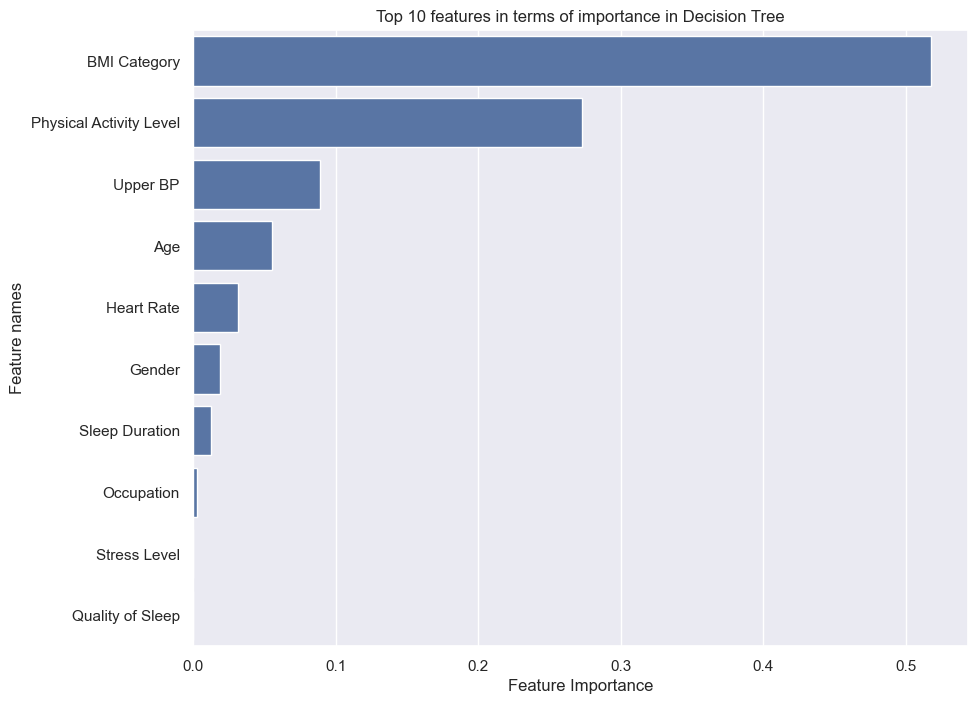

In [49]:
# Top 10 important features
imp_df=pd.DataFrame({"Feature name":x_train.columns,
                    "importance":dtree.feature_importances_}).sort_values(by="importance",ascending=False).head(10)
plt.figure(figsize=(10,8))
sbn.barplot(data=imp_df,x="importance",y="Feature name")

plt.xlabel("Feature Importance")
plt.ylabel("Feature names")
plt.title("Top 10 features in terms of importance in Decision Tree")
plt.show()

Text(47.25, 0.5, 'Actual Values')

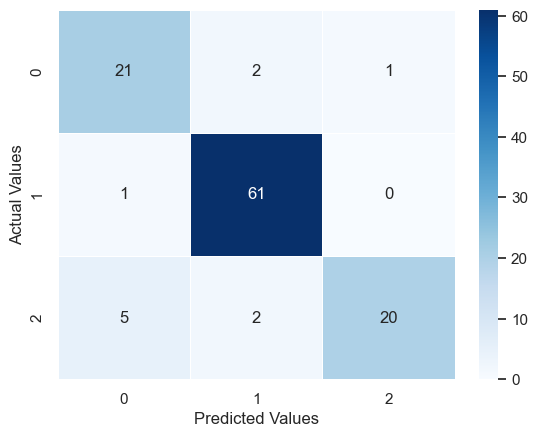

In [50]:
#confusionMatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_tree)
sbn.heatmap(data=cm,linewidth=.5,annot=True,cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()
rforest.fit(x_train,y_train)
model_accuracy(rforest,"Random Forest before CV")

------------------------Random Forest before CV-------------------------------------------------------------------
Accuracy:89.38%
F1 Score:0.89
Precison Score:0.89
Recall Score:0.89
Jaccard Score:0.81


In [52]:
#GridSearch CV
para_grid={
    "n_estimators":[100,200],
    "max_depth":[None,5,10],
    "max_features":["sqrt","log2",None],
    "random_state":[0,42]
}


grid_search=GridSearchCV(rforest,para_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200], 'random_state': [0, 42]})

In [58]:
rforest2=RandomForestClassifier(max_depth=5, random_state=0,max_features="sqrt",n_estimators=100)
rforest2.fit(x_train,y_train)
model_accuracy(rforest2,"Random Forest after CV")

------------------------Random Forest after CV-------------------------------------------------------------------
Accuracy:89.38%
F1 Score:0.89
Precison Score:0.89
Recall Score:0.89
Jaccard Score:0.81


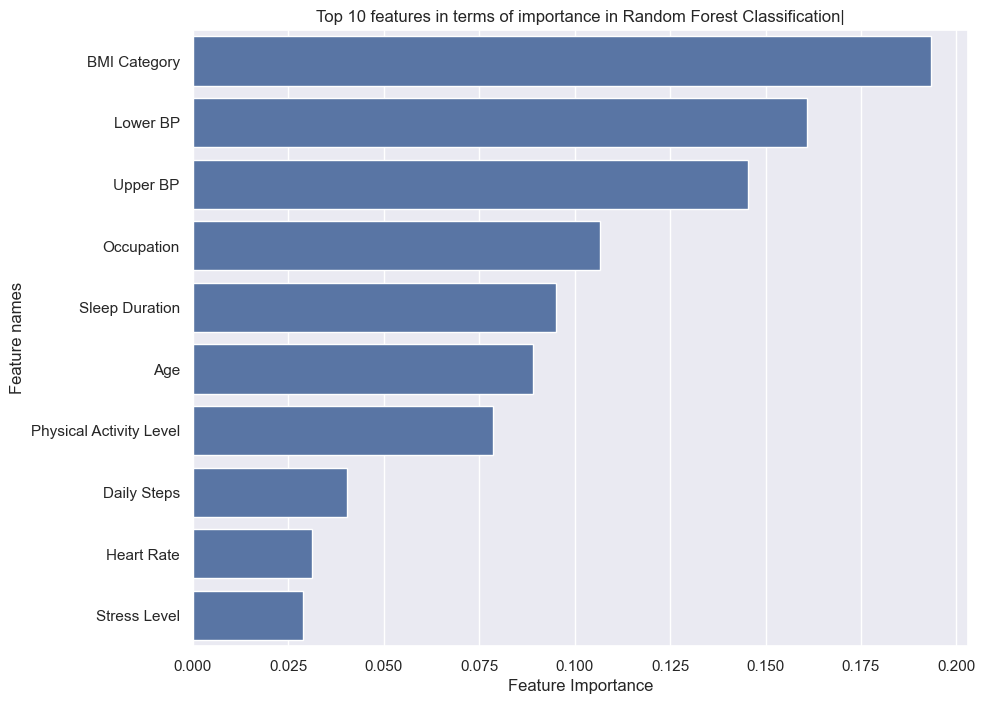

In [59]:
# Top 10 important features after CV
imp_df=pd.DataFrame({"Feature name":x_train.columns,
                    "importance":rforest2.feature_importances_}).sort_values(by="importance",ascending=False).head(10)
plt.figure(figsize=(10,8))
sbn.barplot(data=imp_df,x="importance",y="Feature name")

plt.xlabel("Feature Importance")
plt.ylabel("Feature names")
plt.title("Top 10 features in terms of importance in Random Forest Classification|")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

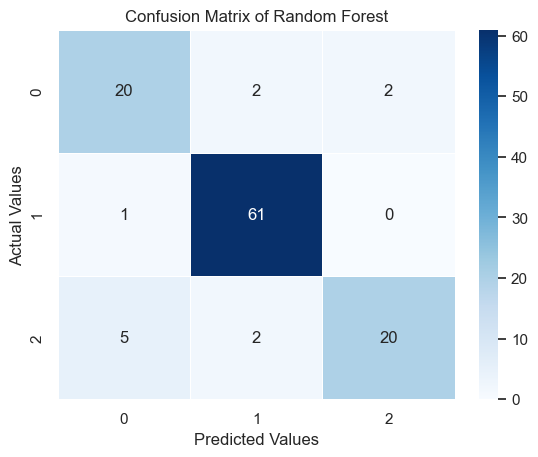

In [62]:
y_pred_rforest=rforest2.predict(x_test)
cm2=confusion_matrix(y_test,y_pred_rforest)
sbn.heatmap(data=cm2,linewidth=.5,annot=True,cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix of Random Forest")

In [64]:
def makeconfusionmatrix(model,modelname):
    y_pred=model.predict(x_test)
    cm2=confusion_matrix(y_test,y_pred)
    sbn.heatmap(data=cm2,linewidth=.5,annot=True,cmap="Blues")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title(f"Confusion Matrix of {modelname}")


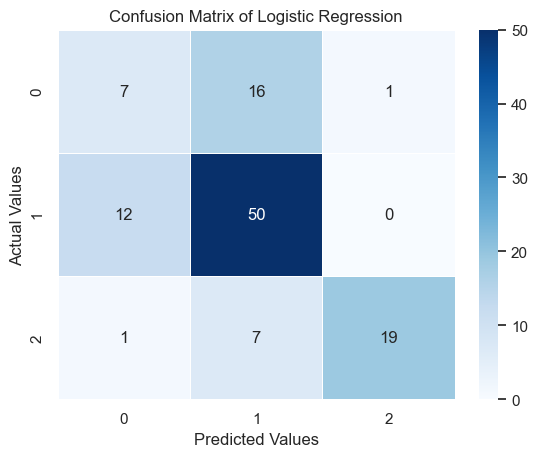

In [67]:
makeconfusionmatrix(lr,"Logistic Regression")



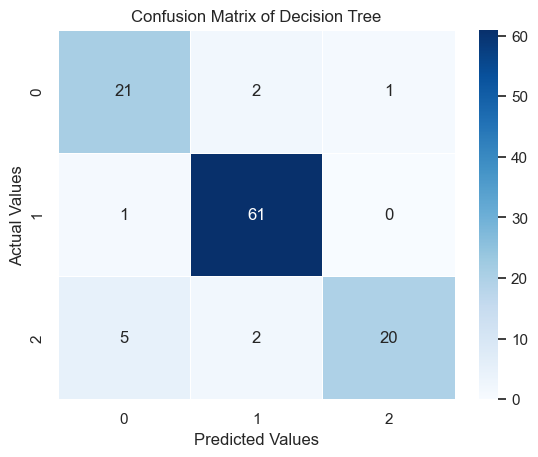

In [68]:
makeconfusionmatrix(dtree,"Decision Tree")

In [70]:
model_accuracy(dtree,"Decision Tree")
model_accuracy(lr,"Logistic Regression")
model_accuracy(rforest2,"Random Forest")

------------------------Decision Tree-------------------------------------------------------------------
Accuracy:90.27%
F1 Score:0.9
Precison Score:0.9
Recall Score:0.9
Jaccard Score:0.82
------------------------Logistic Regression-------------------------------------------------------------------
Accuracy:67.26%
F1 Score:0.67
Precison Score:0.67
Recall Score:0.67
Jaccard Score:0.51
------------------------Random Forest-------------------------------------------------------------------
Accuracy:89.38%
F1 Score:0.89
Precison Score:0.89
Recall Score:0.89
Jaccard Score:0.81
